In [1]:
# Importamos las librerías necesarios
from tensorflow.keras.layers import BatchNormalization, Conv2D, Conv2DTranspose, LeakyReLU, Activation, Flatten, Dense, MaxPooling2D, UpSampling2D, Dropout
from tensorflow.keras.layers import Reshape, Input
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Concatenate
from keras.utils import image_dataset_from_directory, array_to_img, load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os
from sklearn.model_selection import train_test_split
import os, random
from sklearn import preprocessing
from skimage import color
import tensorflow as tf

In [2]:
%cd

C:\Users\Ana Rodriguez


In [3]:
%cd Desktop\MASTER IA\TFM\autoencoder+MLP

C:\Users\Ana Rodriguez\Desktop\MASTER IA\TFM\autoencoder+MLP


In [4]:
##### PREPARAR EL CONJUNTO DE DATOS

In [5]:
#CLASE NORMAL: 0, CLASE ANOMALIAS: 1

In [6]:
#IMAGENES NORMAL

In [7]:
import cv2
import os

# Definir la carpeta donde se encuentran las imágenes
carpeta_imagenes = "dataset/normal"

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Inicializar listas para almacenar las imágenes y las etiquetas
normal = []
etiquetas_normal = []

# Recorrer todos los archivos en la carpeta
for archivo in archivos:
    # Obtener la ruta completa de la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)
    
    # Cargar la imagen utilizando OpenCV
    img = cv2.imread(ruta_imagen)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_res= cv2.resize(img_rgb, dsize=(224,224),interpolation=cv2.INTER_CUBIC)
    
    
    # Agregar la imagen y la etiqueta a las listas correspondientes
    normal.append(img_res)
    etiquetas_normal.append(0)  # Puedes modificar esta línea para obtener las etiquetas de alguna manera específica


In [8]:
print(len(etiquetas_normal))
print(normal[2])
print(etiquetas_normal[2])

2587
[[[139 144 150]
  [135 140 145]
  [141 149 152]
  ...
  [173 171 172]
  [175 173 174]
  [159 157 158]]

 [[150 150 156]
  [147 148 153]
  [165 167 170]
  ...
  [179 177 178]
  [163 161 162]
  [150 148 149]]

 [[141 140 145]
  [159 158 163]
  [156 157 160]
  ...
  [167 165 166]
  [146 144 145]
  [150 146 147]]

 ...

 [[167 164 159]
  [165 162 158]
  [162 161 157]
  ...
  [127 123 122]
  [131 127 126]
  [134 130 129]]

 [[169 166 161]
  [169 166 161]
  [154 154 149]
  ...
  [134 129 129]
  [136 131 131]
  [134 130 129]]

 [[169 166 156]
  [165 163 155]
  [161 162 154]
  ...
  [138 132 130]
  [130 125 123]
  [133 129 126]]]
0


In [9]:
#IMAGENES ANOMALÍAS

In [10]:
# Definir la carpeta donde se encuentran las imágenes
carpeta_imagenes = "dataset/anomalias"

# Obtener la lista de archivos en la carpeta
archivos = os.listdir(carpeta_imagenes)

# Inicializar listas para almacenar las imágenes y las etiquetas
anomalias = []
etiquetas_anomalias = []

# Recorrer todos los archivos en la carpeta
for archivo in archivos:
    # Obtener la ruta completa de la imagen
    ruta_imagen = os.path.join(carpeta_imagenes, archivo)
    
    # Cargar la imagen utilizando OpenCV
    img = cv2.imread(ruta_imagen)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_res= cv2.resize(img_rgb, dsize=(224,224),interpolation=cv2.INTER_CUBIC)
    
    
    # Agregar la imagen y la etiqueta a las listas correspondientes
    anomalias.append(img_res)
    etiquetas_anomalias.append(1)  # Puedes modificar esta línea para obtener las etiquetas de alguna manera específica


In [11]:
print(len(etiquetas_anomalias))
print(anomalias[2])
print(etiquetas_anomalias[2])

1518
[[[145 171 194]
  [145 171 194]
  [147 173 196]
  ...
  [141 135 129]
  [143 136 130]
  [147 140 134]]

 [[145 172 194]
  [145 171 193]
  [146 172 194]
  ...
  [140 133 127]
  [140 133 127]
  [140 133 126]]

 [[147 173 195]
  [147 173 195]
  [148 173 195]
  ...
  [141 133 130]
  [140 132 128]
  [139 131 127]]

 ...

 [[122 115 109]
  [129 122 116]
  [160 153 144]
  ...
  [141 138 129]
  [137 133 124]
  [129 123 118]]

 [[157 150 143]
  [165 158 150]
  [156 149 140]
  ...
  [145 141 132]
  [141 137 128]
  [152 148 141]]

 [[169 162 153]
  [158 151 141]
  [133 126 116]
  ...
  [131 127 117]
  [135 132 123]
  [158 155 148]]]
1


In [12]:
#DIVIDIR CONJUNTO DE DATOS 

In [13]:
from sklearn.model_selection import train_test_split
import numpy as np

# Concatenar las imágenes normales y las imágenes con anomalías
X = np.concatenate((normal, anomalias), axis=0)

# Crear una variable y que contenga las etiquetas para las imágenes normales y las imágenes con anomalías
y = np.concatenate((etiquetas_normal, etiquetas_anomalias), axis=0)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dividir el conjunto de entrenamiento en entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Comprobación de las dimensiones de los conjuntos de datos
print('Tamaño de X_train:', X_train.shape)
print('Tamaño de y_train:', y_train.shape)
print('Tamaño de X_val:', X_val.shape)
print('Tamaño de y_val:', y_val.shape)
print('Tamaño de X_test:', X_test.shape)
print('Tamaño de y_test:', y_test.shape)

Tamaño de X_train: (2627, 224, 224, 3)
Tamaño de y_train: (2627,)
Tamaño de X_val: (657, 224, 224, 3)
Tamaño de y_val: (657,)
Tamaño de X_test: (821, 224, 224, 3)
Tamaño de y_test: (821,)


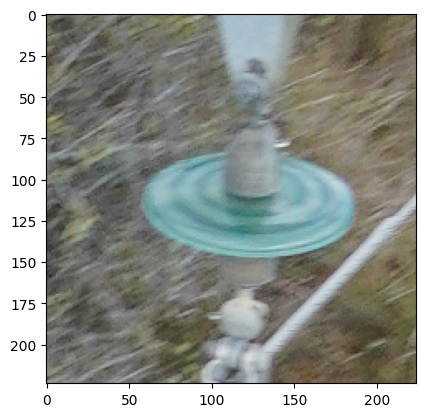

Clase: 1


In [14]:
plt.imshow(X_train[2], cmap='gray')
plt.show()
print('Clase:', y_train[2])

In [15]:
# TRANSFER LEARNING- FINE TUNING: VGG16.

In [16]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import imagenet_utils

In [17]:
#Preprocesamiento VGG16
X_train = imagenet_utils.preprocess_input(X_train) 
X_test = imagenet_utils.preprocess_input(X_test) 
X_val = imagenet_utils.preprocess_input(X_val)

In [18]:
print(np.shape(X_train[2]))

(224, 224, 3)


In [19]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

In [20]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [21]:
# Congelamos las capas de los 4 primeros bloques convolucionales, el quinto se re-entrena
# En base_model.layers.name tenemos la información del nombre de la capa
for layer in base_model.layers: 
    if layer.name == 'block3_conv1': 
        break 
    layer.trainable = False 
    print('Capa ' + layer.name + ' congelada...') 

Capa input_1 congelada...
Capa block1_conv1 congelada...
Capa block1_conv2 congelada...
Capa block1_pool congelada...
Capa block2_conv1 congelada...
Capa block2_conv2 congelada...
Capa block2_pool congelada...


In [22]:
from tensorflow.keras import regularizers, layers

In [23]:
# Cogemos la última capa del model y le añadimos nuestro clasificador (top_model)
last = base_model.layers[-1].output 
x = Flatten()(last) 

x= Dense(units=128, activation='relu',kernel_regularizer=regularizers.l2(0.3))(x)
x= Dropout(0.25)(x) 
x= BatchNormalization()(x) 
x= Dense(units=64, activation='relu',kernel_regularizer=regularizers.l2(0.3))(x)
x= BatchNormalization()(x) 
x= Dropout(0.25)(x) 
x= Dense(units=32, activation='relu',kernel_regularizer=regularizers.l2(0.3))(x)
x= BatchNormalization()(x) 
x= Dropout(0.25)(x) 
x= Dense(units=16, activation='relu',kernel_regularizer=regularizers.l2(0.3))(x)
x= BatchNormalization()(x) 
x= Dropout(0.25)(x) 

x= Dense(units=2, activation='softmax', name='predictions')(x)

model = Model(base_model.input, x) 



model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train) 
y_val = to_categorical(y_test) 

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 
h=model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data= (X_val, y_val))

Epoch 1/100
83/83 [==============================] - ETA: 0s - loss: 37.1576 - accuracy: 0.5303

ValueError: Data cardinality is ambiguous:
  x sizes: 657
  y sizes: 821
Make sure all arrays contain the same number of samples.

In [54]:
print("[INFO]: Evaluando red neuronal...")
model.predict(X_test)
loss, accuracy = model.evaluate(X_test, y_test)
print('Loss {}, accuracy {}'.format(loss,accuracy))

[INFO]: Evaluando red neuronal...
26/26 [==============================] - 95s 4s/step - loss: 4.8444 - accuracy: 0.6431
Loss 4.844354152679443, accuracy 0.643118143081665


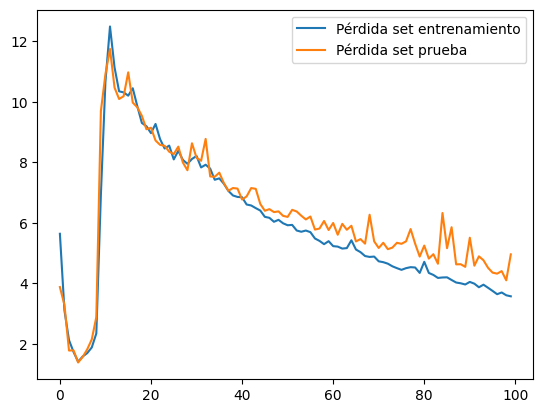

In [55]:
plt.plot(h.history["loss"], label="Pérdida set entrenamiento")
plt.plot(h.history["val_loss"], label="Pérdida set prueba")
plt.legend()

In [56]:
from sklearn.metrics import classification_report

In [57]:
pred=model.predict(X_test)

26/26 [==============================] - 95s 4s/step


In [58]:
y_pred=[]
for i in pred:
    if i>0.5:
        i=1
        y_pred.append(i)
    else:
        i=0
        y_pred.append(i)

In [59]:
# Obtener el report de clasificación
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.50      0.65       549
           1       0.48      0.93      0.63       272

    accuracy                           0.64       821
   macro avg       0.71      0.72      0.64       821
weighted avg       0.79      0.64      0.65       821

